In [1]:
import pandas as pd
import numpy as np

# Loading the data and a first look

In [2]:
data=pd.read_csv("taxi_tidy.csv")

In [3]:
data.head()

,Unnamed: 0,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,1,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,2,7,5,21,146,4,672,1,MN24,1,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17
2,3,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
3,4,2,5,22,148,6,637,1,MN17,1,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33
4,5,17,5,21,141,6,2491,1,MN17,4,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98


# Fixing column names

From the first 5 rows of the table, it looks like the column "Unnamed: 0" is just one more than the value of the index of each row. After testing that in fact this is true with an assertion, we removed the column.

In [4]:
data["Unnamed: 0"] = data["Unnamed: 0"].apply(lambda x: x-1)
assert np.array_equal(np.array(data.index), np.array(data["Unnamed: 0"]))
data = data.drop(["Unnamed: 0"], axis=1) ## redundant index column dropped

Then we change the column name such as every word is divided by a '_' and that all letters are lower case. We also fixed a spelling mistake.

In [5]:
#unifying names 
data = data.rename(columns={"pickup_BoroCode":"pickup_boro_code","pickup_NTACode":"pickup_nta_code","dropoff_BoroCode":"dropoff_boro_code","dropoff_NTACode":"dropoff_nta_code", "pickup_doy":"pickup_day"})
data

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,7,5,21,146,4,672,1,MN24,1,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17
2,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
3,2,5,22,148,6,637,1,MN17,1,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33
4,17,5,21,141,6,2491,1,MN17,4,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491287,23,5,21,141,6,193,1,MN14,1,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,MN14-MN12
491288,22,5,22,151,2,945,1,MN40,1,MN22,-73.956261,40.787140,-73.978577,40.728729,1,1,5.30,18.0,MN40-MN22
491289,19,5,19,132,4,764,1,MN20,1,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,MN20-MN22
491290,21,5,20,140,5,955,1,MN13,1,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,MN13-MN27


# Understanding what each variable measures
We created the following function called *describe* that takes as input a column of the dataset and shows the number of observations of that column, the mean, std, min, max and the three quartiles. It also shows the set of values of the observations and also plots a histogram. 

In [6]:
def describe(column):
    print(data[column].describe())
    print(set(data[column]))
    data[column].hist() 

count    491292.000000
mean         13.612855
std           6.461628
min           0.000000
25%           9.000000
50%          14.000000
75%          19.000000
max          23.000000
Name: pickup_hour, dtype: float64
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


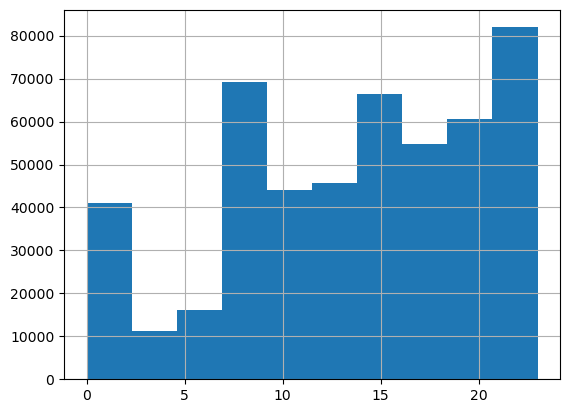

In [7]:
describe("pickup_hour")

count    491292.0
mean          5.0
std           0.0
min           5.0
25%           5.0
50%           5.0
75%           5.0
max           5.0
Name: pickup_month, dtype: float64
{5}


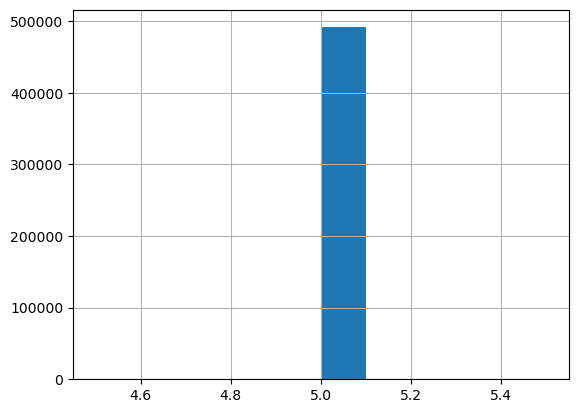

In [8]:
describe("pickup_month") # consider dropping the column, its just may, the information can be inferred from other columns anyways

count    491292.000000
mean         19.900013
std           1.278181
min          18.000000
25%          19.000000
50%          20.000000
75%          21.000000
max          22.000000
Name: pickup_week, dtype: float64
{18, 19, 20, 21, 22}


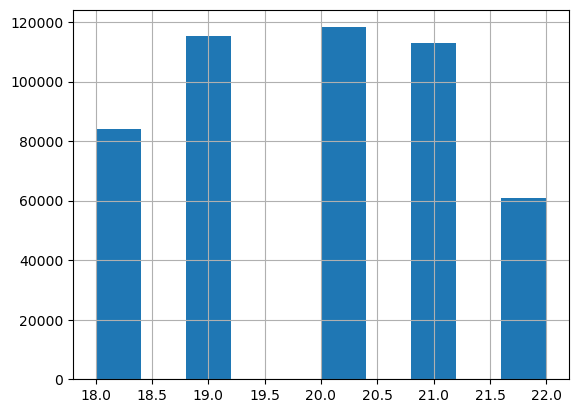

In [9]:
describe("pickup_week")
# Loren: I think we can remove pickup_week as that can easily be calcualted from the pickup_day variable

count    491292.000000
mean        136.342308
std           8.667126
min         122.000000
25%         129.000000
50%         136.000000
75%         144.000000
max         152.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 122, 123, 124, 125, 126, 127}


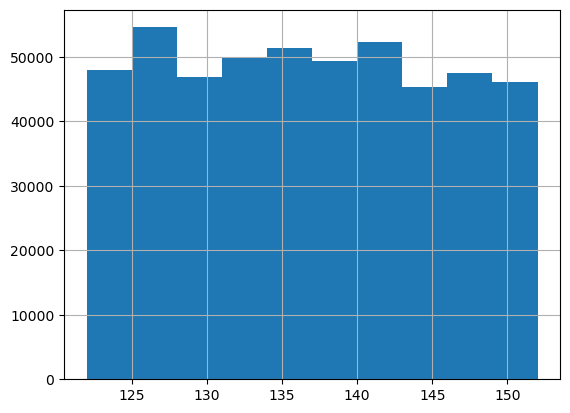

In [10]:
describe("pickup_day")

count    491292.000000
mean          3.916406
std           1.979211
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: pickup_wday, dtype: float64
{1, 2, 3, 4, 5, 6, 7}


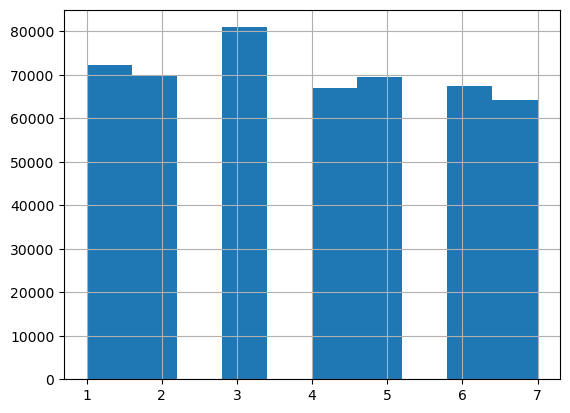

In [11]:
describe("pickup_wday")

## Creating a unified date column
**Add here code for column 'date'**

count    491292.000000
mean        985.000853
std        2694.842046
min           0.000000
25%         434.000000
50%         716.000000
75%        1157.000000
max       86393.000000
Name: length_time, dtype: float64
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 1

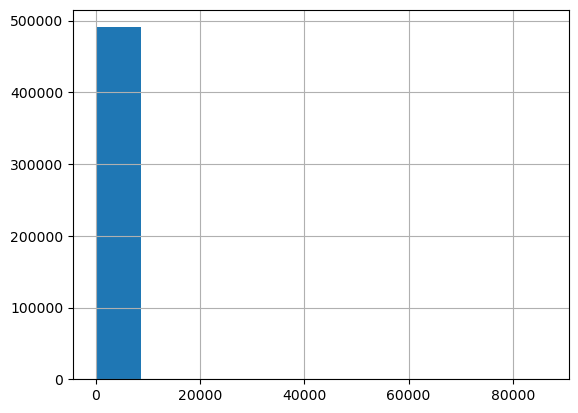

In [12]:
describe("length_time") ## investigate further: possible outliers in terms of time<60 and large time assuming we have time given in seconds

<Axes: >

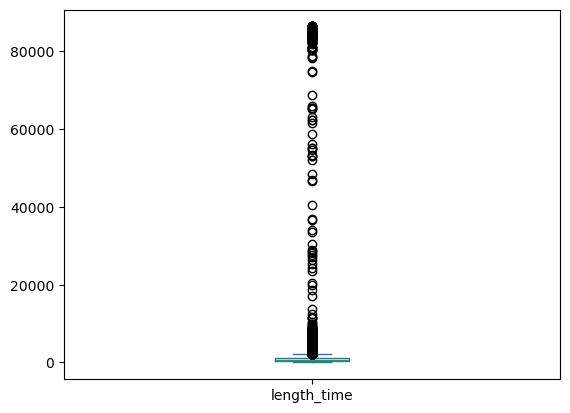

In [13]:
data["length_time"].plot.box() # a lot of outliers

In [14]:
data.loc[data["length_time"]<60] # ok, some of the are reasonable, somebody got an uver for like 0.2 km and that takes a minute. However I will remove all the trips with time or distance either 0

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
63,19,5,20,134,6,56,1,MN12,1,MN12,-73.972313,40.793957,-73.971474,40.794460,1,1,0.10,2.5,MN12-MN12
1704,13,5,19,129,1,54,1,MN31,1,MN32,-73.958122,40.773087,-73.955620,40.776546,2,4,0.32,3.0,MN31-MN32
2114,14,5,20,140,5,39,1,MN40,1,MN40,-73.970428,40.764606,-73.968750,40.766502,2,2,0.18,2.5,MN40-MN40
2966,15,5,19,128,7,3,1,MN23,1,MN23,-73.991661,40.730068,-73.991653,40.730076,1,1,0.00,2.5,MN23-MN23
3236,23,5,21,147,5,48,1,MN36,1,MN36,-73.942055,40.835396,-73.942062,40.835388,2,1,0.00,52.0,MN36-MN36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489431,2,5,19,133,5,29,1,MN17,1,MN17,-73.982063,40.759899,-73.985420,40.761311,2,1,0.20,2.5,MN17-MN17
489934,4,5,21,142,7,41,1,MN21,1,MN20,-73.983559,40.738342,-73.980431,40.742733,1,1,0.30,3.0,MN21-MN20
490178,0,5,20,139,4,27,3,BK28,3,BK28,-73.993050,40.619965,-73.993050,40.619965,1,1,0.00,14.0,BK28-BK28
490300,21,5,22,148,6,18,1,MN32,1,MN32,-73.953232,40.776356,-73.953232,40.776356,1,1,4.60,15.0,MN32-MN32


In [15]:
data = data.loc[data["length_time"]>=10] # a ride has to last at least 10 seconds
data = data.loc[data["trip_distance"]>=0.01]

0.80000     1300.0000
0.90000     1760.0000
0.95000     2267.0000
0.99000     3606.0000
0.99500     4271.0100
0.99900    19354.3020
0.99905    54708.0803
Name: length_time, dtype: float64


<Axes: >

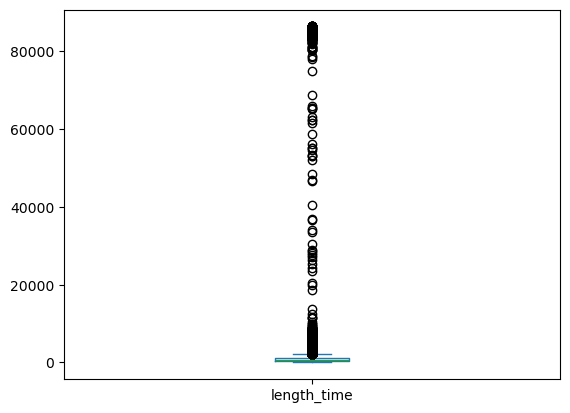

In [16]:
print(data["length_time"].quantile([0.8,0.9,0.95,0.99,0.995,0.999, 0.99905]))
data["length_time"].plot.box() #3600 seconds is an hour, what do we do with that many outliers? Where do we set the cutoff point? I propose 0.99 or 0.995

## Variable length_time
**To do:**
Discuss what are we doing with this variable, I(Loren) suggest we look at this at the end after we deal with all the other issues, because some of them may be solved over time

In [17]:
# cutting out data above 0.995 quantile
# data=data.loc[data["length_time"]<=4271.01]

<Axes: >

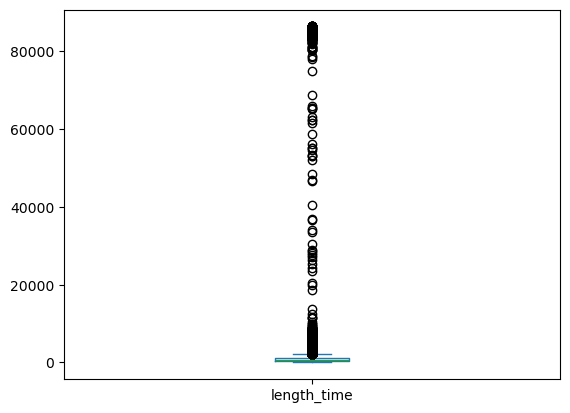

In [18]:
data["length_time"].plot.box() # now it looks much better 

count    490399.000000
mean          1.209403
std           0.739318
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: pickup_boro_code, dtype: float64
{1, 2, 3, 4, 5}


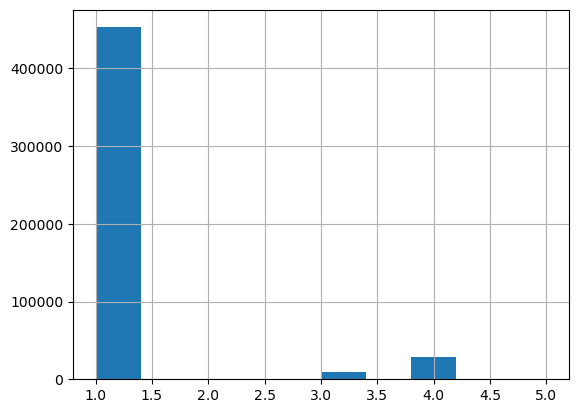

In [19]:
describe("pickup_boro_code") # The five boroughs of NYC: 1 is Manhattan, 2 is The Bronx, 3 is Brooklyn,  4 is Queens, and 5 is Staten Island

count     490399
unique       153
top         MN17
freq       76213
Name: pickup_nta_code, dtype: object
{'QN61', 'MN22', 'QN18', 'BX06', 'BX62', 'QN68', 'QN25', 'MN17', 'QN06', 'QN53', 'QN70', 'QN02', 'MN50', 'BK38', 'MN03', 'BX14', 'MN12', 'MN25', 'QN45', 'BX41', 'QN72', 'BK77', 'BK63', 'MN11', 'BK32', 'BX22', 'BX35', 'BK37', 'BX46', 'MN40', 'BK99', 'QN60', 'BX29', 'QN42', 'BK72', 'BX26', 'QN54', 'BK78', 'BX37', 'BX28', 'QN26', 'MN23', 'BK93', 'QN56', 'BK85', 'SI37', 'QN50', 'BX09', 'MN20', 'BK88', 'BK40', 'QN47', 'BK90', 'BK42', 'MN99', 'QN35', 'BK09', 'BK83', 'QN01', 'BK17', 'BK35', 'BK61', 'BX30', 'QN21', 'BX36', 'BK96', 'BX05', 'MN14', 'BK50', 'MN35', 'BK95', 'SI35', 'MN15', 'MN34', 'BK44', 'MN21', 'BX49', 'QN07', 'BX59', 'QN99', 'BK33', 'QN76', 'BX17', 'QN37', 'BK34', 'QN49', 'MN19', 'BX75', 'QN27', 'BK30', 'BK79', 'QN30', 'SI22', 'BX39', 'QN20', 'BX40', 'BK60', 'BX10', 'BK91', 'MN36', 'BK82', 'BK19', 'BK28', 'QN19', 'QN51', 'BX63', 'BK21', 'MN13', 'QN48', 'QN98', 'MN27', 'MN09'

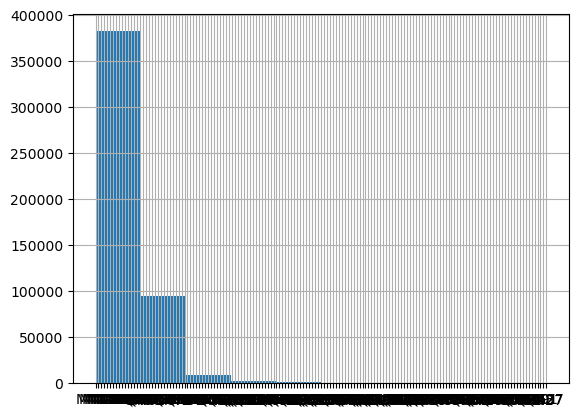

In [20]:
describe("pickup_nta_code")

count    490399.000000
mean          1.273957
std           0.789599
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: dropoff_boro_code, dtype: float64
{1, 2, 3, 4, 5}


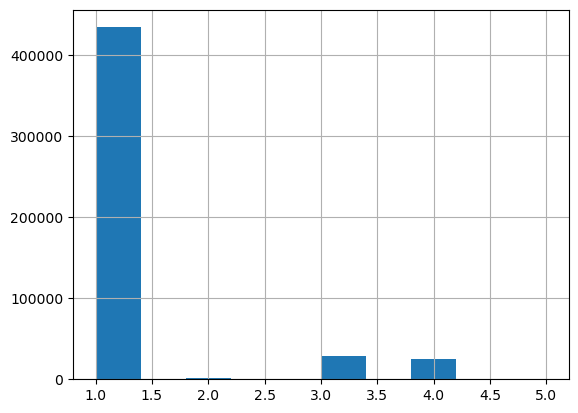

In [21]:
describe("dropoff_boro_code")

count     490399
unique       190
top         MN17
freq       70229
Name: dropoff_nta_code, dtype: object
{'QN66', 'SI45', 'QN61', 'MN22', 'QN18', 'BX06', 'BX62', 'QN68', 'QN25', 'MN17', 'QN06', 'QN53', 'QN70', 'QN02', 'MN50', 'BK38', 'MN03', 'BX14', 'MN12', 'MN25', 'QN45', 'BX41', 'QN72', 'BK77', 'BK63', 'BX44', 'MN11', 'QN33', 'BK32', 'BX22', 'SI12', 'BX35', 'BK37', 'BX46', 'MN40', 'BX29', 'BK99', 'QN60', 'QN42', 'BK72', 'BX26', 'QN54', 'BK78', 'BX37', 'QN05', 'BX28', 'SI25', 'BX27', 'QN26', 'SI14', 'MN23', 'BK93', 'QN56', 'BK85', 'SI37', 'QN50', 'BX09', 'MN20', 'BK88', 'BK40', 'QN47', 'BX31', 'BK90', 'BK42', 'MN99', 'QN35', 'BK09', 'BK17', 'BK83', 'QN10', 'BK35', 'BK61', 'SI11', 'BX30', 'QN01', 'QN21', 'BX36', 'BK96', 'BX05', 'MN14', 'BK50', 'MN35', 'BK95', 'SI54', 'SI35', 'MN15', 'MN34', 'BK44', 'MN21', 'BX49', 'QN07', 'BX59', 'QN99', 'BK26', 'BK33', 'QN76', 'BX17', 'QN37', 'BK34', 'QN49', 'MN19', 'BX75', 'QN15', 'QN27', 'BK30', 'BK79', 'QN30', 'SI22', 'BX39', 'QN20', 'BX40', 'BK60

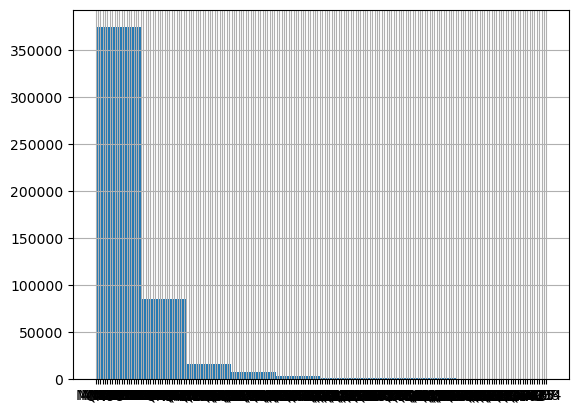

In [22]:
describe("dropoff_nta_code")

count    490399.000000
mean        -73.973989
std           0.037553
min         -74.104080
25%         -73.992378
50%         -73.981941
75%         -73.967674
max         -73.728279
Name: pickup_longitude, dtype: float64
{-73.9803466796875, -73.8631591796875, -73.9527359008789, -73.9566421508789, -73.9917984008789, -73.9722671508789, -73.9831771850586, -73.7901382446289, -73.9726791381836, -73.9804916381836, -73.960693359375, -73.976318359375, -73.988037109375, -73.941162109375, -73.9733581542969, -73.8639831542969, -74.0049133300781, -73.9577331542969, -73.9264831542969, -73.8796081542969, -73.97998046875, -73.87060546875, -73.99951171875, -73.95263671875, -73.96435546875, -73.86279296875, -73.97607421875, -73.95654296875, -73.98388671875, -73.9873046875, -73.7975921630859, -73.7807693481445, -73.9526443481445, -73.9213943481445, -73.8012313842773, -73.7864151000977, -73.9739151000977, -73.9270401000977, -73.9426651000977, -74.0136413574219, -73.9114151000977, -73.8645401000977, -73

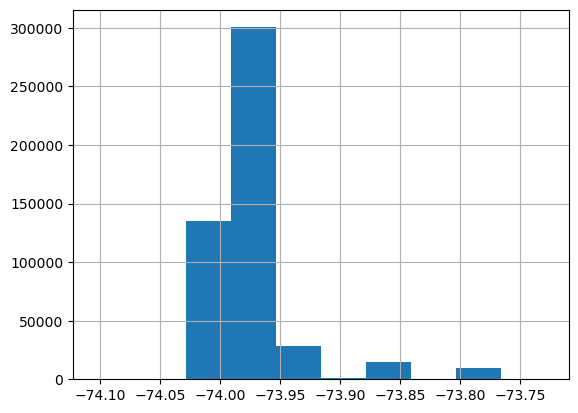

In [23]:
describe("pickup_longitude")

count    490399.000000
mean         40.750561
std           0.027529
min          40.575272
25%          40.736341
50%          40.753010
75%          40.768684
max          40.901421
Name: pickup_latitude, dtype: float64
{40.7859649658203, 40.7234649658203, 40.7836952209473, 40.7924118041992, 40.7129287719727, 40.7854080200195, 40.7193756103516, 40.771728515625, 40.7995491027832, 40.7682991027832, 40.7437744140625, 40.646728515625, 40.7253303527832, 40.7370491027832, 40.7604866027832, 40.7526741027832, 40.7643928527832, 40.7918548583984, 40.6457290649414, 40.7275352478027, 40.7900352478027, 40.7105522155762, 40.7169990539551, 40.7812118530273, 40.7251586914062, 40.7876586914062, 40.6626586914062, 40.8501586914062, 40.7081756591797, 40.6456756591797, 40.7146224975586, 40.7771224975586, 40.643856048584, 40.706356048584, 40.7753028869629, 40.7128028869629, 40.8378028869629, 40.7057991027832, 40.643482208252, 40.705982208252, 40.7261962890625, 40.7738037109375, 40.7742919921875, 40.641479

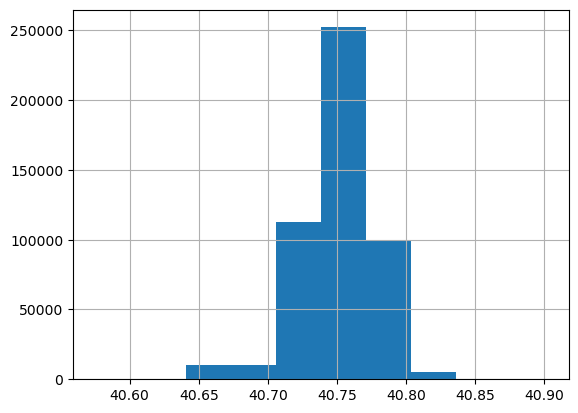

In [24]:
describe("pickup_latitude")

count    490399.000000
mean        -73.973592
std           0.033338
min         -74.242378
25%         -73.991577
50%         -73.979874
75%         -73.963356
max         -73.701439
Name: dropoff_longitude, dtype: float64
{-73.98291015625, -73.99853515625, -73.96728515625, -73.92041015625, -73.95166015625, -73.85791015625, -73.93603515625, -73.87353515625, -73.99658203125, -73.94970703125, -73.8276443481445, -73.953125, -73.890625, -73.9642181396484, -73.7767181396484, -74.1524276733398, -74.0098495483398, -74.0118026733398, -74.0215682983398, -74.0039901733398, -74.0157089233398, -74.0137557983398, -74.0020370483398, -74.0332870483398, -74.0176620483398, -73.957878112793, -73.9684143066406, -73.9522171020508, -73.9990921020508, -73.9209671020508, -73.7959671020508, -73.9053421020508, -73.8760452270508, -73.9971389770508, -73.9658889770508, -73.9815139770508, -73.9190139770508, -73.8365173339844, -73.9657135009766, -73.8407135009766, -73.9730911254883, -73.8480911254883, -73.92112731

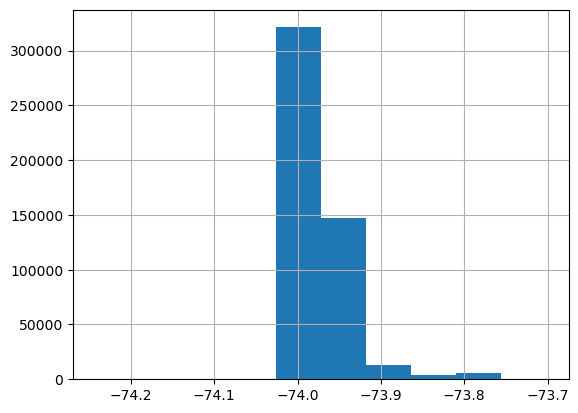

In [25]:
describe("dropoff_longitude")

count    490399.000000
mean         40.751100
std           0.031777
min          40.502365
25%          40.734585
50%          40.753639
75%          40.770145
max          40.911293
Name: dropoff_latitude, dtype: float64
{40.7147483825684, 40.6522483825684, 40.8397483825684, 40.7234649658203, 40.7836952209473, 40.7924118041992, 40.8549118041992, 40.7129287719727, 40.8379287719727, 40.7854080200195, 40.6568756103516, 40.771728515625, 40.7370491027832, 40.7526741027832, 40.7352294921875, 40.7136116027832, 40.7878303527832, 40.7253303527832, 40.7487678527832, 40.7598876953125, 40.7611083984375, 40.7039566040039, 40.7918548583984, 40.7123718261719, 40.7835884094238, 40.7813186645508, 40.6563186645508, 40.8438186645508, 40.6457290649414, 40.7900352478027, 40.7275352478027, 40.6650352478027, 40.6480522155762, 40.8355522155762, 40.7817687988281, 40.7087326049805, 40.7812118530273, 40.8501586914062, 40.7081756591797, 40.6456756591797, 40.7146224975586, 40.6608390808105, 40.7233390808105, 40.

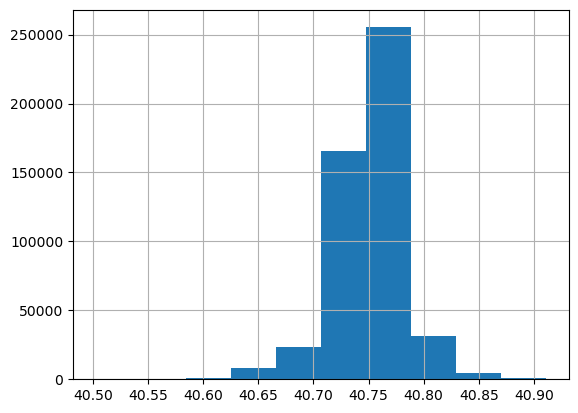

In [26]:
describe("dropoff_latitude")

count    490399.000000
mean          1.526318
std           0.499307
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: vendor_id, dtype: float64
{1, 2}


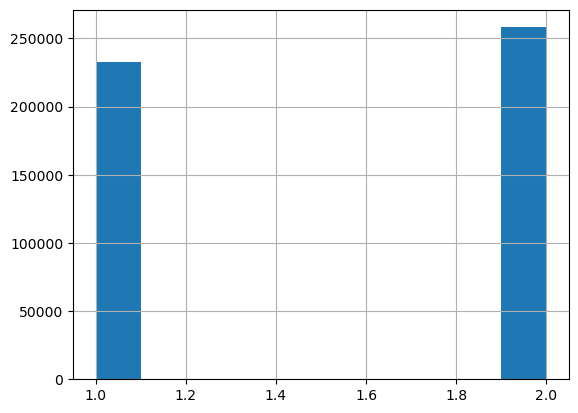

In [27]:
describe("vendor_id")

count    490399.000000
mean          1.641675
std           1.294019
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64
{0, 1, 2, 3, 4, 5, 6}


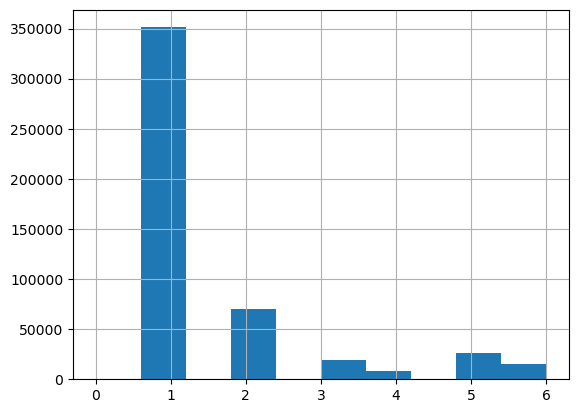

In [28]:
describe("passenger_count") 

In [29]:
data=data.loc[data["passenger_count"]>0] #There should not be any rides with 0 passengers

[1 2]
count    490391.000000
mean          1.526327
std           0.499307
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: vendor_id, dtype: float64
{1, 2}


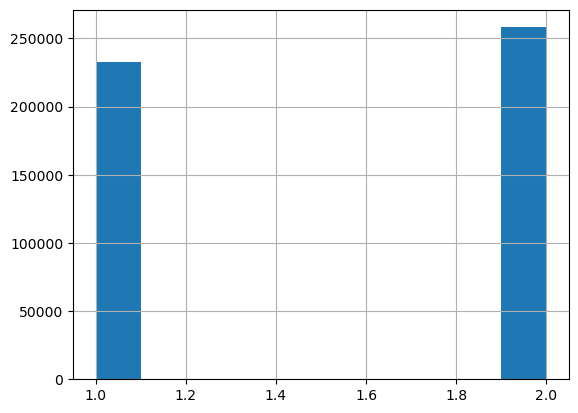

In [30]:
print(data["vendor_id"].unique())
describe("vendor_id")
# maybe we shuld delete this


## Checking if structural constraints are met

### Taxi Fare constraint

Link for taxi fares https://www.nytimes.com/2022/11/17/nyregion/taxi-fare-hike-nyc.html



#### JFK trips

Every ride from or to JFK costs 52 dollars. We should check that this is actually true for all data points. JFK's coordinates are 40.6446° N, 73.7797° W. Despite this we need to know the range of coordinates from which taxis start or end their trip which is still considered JFK according to fares.  
First I created a large rectangle with the coordinates which for sure includes all of JFK. Then, looking at the pickup trips that have fares which are exactly 52 dollars, the fare for the airport, I found the minimum and maximum lognitudes and latitudes of the JFK area. 

In [31]:
pickup_mask = (data["pickup_longitude"] > -73.79) &  (data["pickup_longitude"] < -73.76 ) &  (data["pickup_latitude"] > 40.5 ) &  (data["pickup_latitude"] <40.7  )
airport_pickup = data.loc[(data["fare_amount"] == 52) & (pickup_mask)]

JFK_min_long = min(airport_pickup["pickup_longitude"])
JFK_max_long = max(airport_pickup["pickup_longitude"])
JFK_min_lat = min(airport_pickup["pickup_latitude"])
JFK_max_lat = max(airport_pickup["pickup_latitude"])

airport_pickup_dropoff_mask =  ((data["pickup_longitude"] > JFK_min_long) & (data["pickup_longitude"] < JFK_max_long) &  (data["pickup_latitude"] > JFK_min_lat ) &  (data["pickup_latitude"] <JFK_max_lat)) |(data["dropoff_longitude"] > JFK_min_long) & (data["dropoff_longitude"] < JFK_max_long) &  (data["dropoff_latitude"] > JFK_min_lat ) &  (data["dropoff_latitude"] <JFK_max_lat)
airport_pickup_mask =  (data["pickup_longitude"] > JFK_min_long) & (data["pickup_longitude"] < JFK_max_long) &  (data["pickup_latitude"] > JFK_min_lat )
airport_dropoff_mask = (data["dropoff_longitude"] > JFK_min_long) & (data["dropoff_longitude"] < JFK_max_long) &  (data["dropoff_latitude"] > JFK_min_lat ) &  (data["dropoff_latitude"] <JFK_max_lat)
data.loc[ (data["fare_amount"] == 52) & (pickup_mask)]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
27,13,5,19,130,2,3170,4,QN98,1,MN17,-73.786415,40.644684,-73.986954,40.761089,1,2,18.10,52.0,QN98-MN17
179,14,5,20,140,5,2925,4,QN98,1,MN19,-73.784149,40.648548,-73.970306,40.752476,1,1,16.80,52.0,QN98-MN19
263,12,5,22,148,6,3105,4,QN98,1,MN20,-73.789886,40.646790,-73.978867,40.749298,2,1,16.29,52.0,QN98-MN20
286,13,5,20,140,5,3882,4,QN98,1,MN23,-73.788612,40.642467,-74.007500,40.735443,2,1,19.62,52.0,QN98-MN23
295,14,5,21,143,1,3645,4,QN98,1,MN24,-73.789627,40.646843,-74.004372,40.721272,2,1,20.26,52.0,QN98-MN24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490801,17,5,19,127,6,3511,4,QN98,1,MN23,-73.789787,40.646782,-74.004440,40.733456,2,5,18.41,52.0,QN98-MN23
490832,17,5,21,141,6,3240,4,QN98,1,MN13,-73.783691,40.648670,-74.003304,40.751419,2,4,18.35,52.0,QN98-MN13
491024,17,5,18,123,2,3637,4,QN98,1,MN23,-73.781143,40.644955,-74.000572,40.735374,1,1,18.90,52.0,QN98-MN23
491140,14,5,19,128,7,3178,4,QN98,1,MN12,-73.781898,40.644741,-73.982727,40.781826,1,3,21.40,52.0,QN98-MN12


Rides that were from (and to if airport_pickup_dropoff_mask is used) but where the taxi fare isn't 52.

**To Discuss:**
What are we doing with these rows?


In [32]:
data.loc[(data["fare_amount"] != 52) & (airport_pickup_mask)]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
43,21,5,20,135,7,2342,4,QN98,3,BK38,-73.788910,40.646790,-73.992203,40.687416,1,1,13.50,41.5,QN98-BK38
118,0,5,21,146,4,613,4,QN98,4,QN57,-73.777344,40.646648,-73.832695,40.661480,1,1,5.10,15.5,QN98-QN57
229,14,5,19,132,4,1502,4,QN98,3,BK96,-73.783882,40.648697,-73.928917,40.656311,2,1,10.42,32.0,QN98-BK96
339,16,5,20,140,5,3059,4,QN98,4,QN31,-73.789696,40.646893,-73.942192,40.748848,2,1,14.81,48.0,QN98-QN31
985,13,5,21,146,4,2693,4,QN98,3,BK69,-73.789886,40.646946,-73.958755,40.686760,1,1,11.60,40.0,QN98-BK69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489926,1,5,20,140,5,1211,4,QN98,4,QN34,-73.776703,40.645386,-73.754005,40.718071,1,1,10.50,29.5,QN98-QN34
490013,5,5,22,151,2,2508,4,QN98,3,BK34,-73.776787,40.645248,-73.997208,40.643608,2,1,21.46,60.0,QN98-BK34
490064,12,5,18,126,5,600,4,QN98,4,QN98,-73.786171,40.649071,-73.786171,40.649071,2,1,1.26,8.0,QN98-QN98
490487,23,5,20,140,5,1742,4,QN98,3,BK75,-73.788071,40.641750,-73.952103,40.699600,2,5,17.92,48.5,QN98-BK75


Rows that seems to be trips from and to airport with a very long trip time.  
**To discuss:**  
What should we do?

In [33]:
data.loc[(data["fare_amount"] == 52) & (airport_pickup_dropoff_mask) & (data["length_time"]>4271)]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
565,15,5,21,141,6,4616,1,MN23,4,QN98,-73.993011,40.734360,-73.786461,40.647629,2,1,16.17,52.0,MN23-QN98
1271,15,5,18,125,4,4334,4,QN98,1,MN17,-73.782059,40.644611,-73.984238,40.759842,2,1,18.13,52.0,QN98-MN17
1319,14,5,19,133,5,4441,1,MN13,4,QN98,-73.991020,40.744656,-73.785637,40.643242,2,1,16.01,52.0,MN13-QN98
1452,18,5,20,135,7,6630,4,QN98,1,MN17,-73.783585,40.648708,-73.978004,40.764732,1,1,18.50,52.0,QN98-MN17
1819,12,5,20,134,6,5654,4,QN98,1,MN17,-73.782967,40.644257,-73.987610,40.757107,1,1,17.70,52.0,QN98-MN17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487976,13,5,19,127,6,4424,4,QN98,1,MN25,-73.788216,40.642075,-74.014740,40.716606,1,3,21.40,52.0,QN98-MN25
489235,17,5,21,143,1,86106,4,QN98,1,MN17,-73.783989,40.646225,-73.992165,40.749088,2,1,17.40,52.0,QN98-MN17
489440,16,5,21,147,5,5664,1,MN17,4,QN98,-73.982681,40.761711,-73.783157,40.648941,2,1,18.10,52.0,MN17-QN98
489514,17,5,20,137,2,5172,1,MN22,4,QN98,-73.984421,40.724899,-73.783272,40.643761,2,1,17.10,52.0,MN22-QN98


In [34]:
assert np.array_equal(data.loc[ (data["fare_amount"] == 52) & (airport_pickup_mask) ]["pickup_boro_code"].unique(), np.array([4]))
assert np.array_equal(data.loc[ (data["fare_amount"] == 52) & (airport_dropoff_mask) ]["dropoff_boro_code"].unique(), np.array([4]))


#### Minimum fare constraint
According to the article above, from 2012-2022, the base fair was $2.5 so no trip can be less than that.  
**To discuss:**  Should we delete these rows?

In [35]:
data.loc[ data["fare_amount"] < 2.5 ]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
393055,13,5,21,144,2,2276,1,MN99,4,QN98,-73.958427,40.800171,-73.78688,40.647285,1,1,18.0,0.01,MN99-QN98


# Checking column types

In [36]:
data.dtypes

pickup_hour            int64
pickup_month           int64
pickup_week            int64
pickup_day             int64
pickup_wday            int64
length_time            int64
pickup_boro_code       int64
pickup_nta_code       object
dropoff_boro_code      int64
dropoff_nta_code      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
vendor_id              int64
passenger_count        int64
trip_distance        float64
fare_amount          float64
pair                  object
dtype: object

## BoroCode

BoroCode represents the 5 different Boroughs of New York. This means it is a categorical variable and not a numerical (continous) one. From https://locatenyc.io/detail-bin we see that: 1 is Manhattan, 2 is The Bronx, 3 is Brooklyn,  4 is Queens, and 5 is Staten Island, therefore we change the numbers of pickup_boro_code and dropoff_boro_code to their respective borough.

In [37]:
borough_mapping = {
    "1": "Manhattan",
    "2": "The Bronx",
    "3": "Brooklyn",
    "4": "Queens",
    "5": "Staten Island"}

# Apply mapping to the column
data['pickup_boro_code'] = data['pickup_boro_code'].astype(str).map(borough_mapping)
data['dropoff_boro_code'] = data['dropoff_boro_code'].astype(str).map(borough_mapping)
data.head()


,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,18,5,19,132,4,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,7,5,21,146,4,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17
2,18,5,19,127,6,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
3,2,5,22,148,6,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33
4,17,5,21,141,6,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98


## pickup_day
Since all the dates are in the month of may, pickup_day can only have values of a certain range.


In [38]:
min_may = 31+28+31+30+1
max_may = 31+28+31+30+31
min_may, max_may

(121, 151)

count    490391.000000
mean        136.341784
std           8.666913
min         122.000000
25%         129.000000
50%         136.000000
75%         144.000000
max         152.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 122, 123, 124, 125, 126, 127}


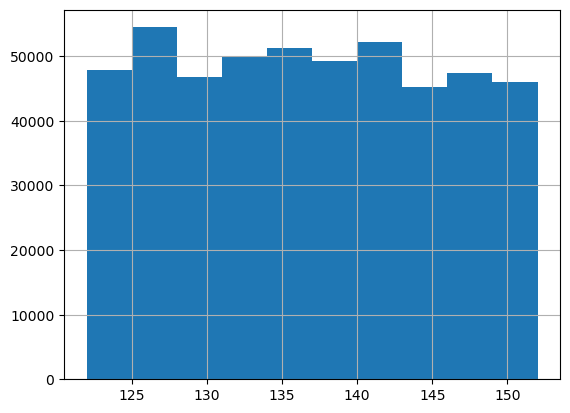

In [39]:
describe("pickup_day")

We see that the maximum pickup_day is 1 value higher than the day of the year that the 31st may is, which suggests that this variable is inflated by value of 1. This is also supported by the fact that otherwise there would be no rides on the 1st of may which woudl be surprising in such a large database.

count    490391.000000
mean        135.341784
std           8.666913
min         121.000000
25%         128.000000
50%         135.000000
75%         143.000000
max         151.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 121, 122, 123, 124, 125, 126, 127}


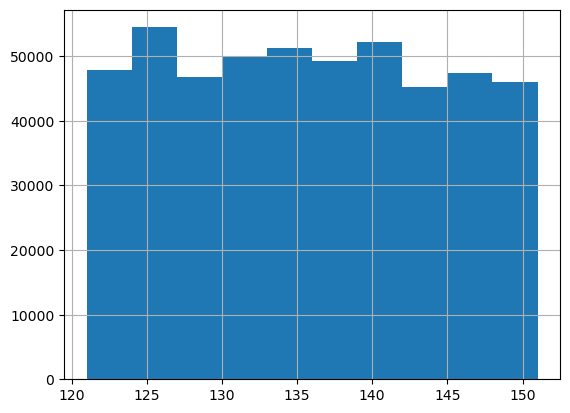

In [40]:
data["pickup_day"] = data["pickup_day"].apply(lambda x: x-1)
describe("pickup_day")

## pickup_wday

**Change this once column date is created so that Monday, Tuesday, etc is calculated using function: date.weekday()**

In [41]:
day_mapping = {
    "5": "Monday",
    "6": "Tuesday",
    "7": "Wednesday",
    "1": "Thursday",
    "2": "Friday",
    "3": "Saturday",
    "4": "Sunday"
}

# Apply mapping to the column
data['pickup_wday'] = data['pickup_wday'].astype(str).map(day_mapping)
data.head()

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,18,5,19,131,Sunday,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,7,5,21,145,Sunday,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17
2,18,5,19,126,Tuesday,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
3,2,5,22,147,Tuesday,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33
4,17,5,21,140,Tuesday,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98


In [42]:
data["pickup_wday"].value_counts()

pickup_wday
Saturday     80763
Thursday     72153
Friday       69873
Monday       69448
Tuesday      67327
Sunday       66826
Wednesday    64001
Name: count, dtype: int64

pickup_wday referes to the day of the week of the pickup. After checking that the data is in fact from 1-7, we check that 1 refers to Monday, 2 to Tuesday, and so on, by calculating the day of the week from the day of the month and knowing that 1st January 2015 is Thursday.

In [43]:
d = data["pickup_day"].apply(lambda x: x%7)
d = d.replace(0, 7)
d.value_counts()
d = d.replace(4, "Sunday")
d = d.replace(3,"Saturday")
d = d.replace(2, "Friday")
d = d.replace(1, "Thursday")
d = d.replace(7, "Wednesday")
d = d.replace(6, "Tuesday")
d = d.replace(5, "Monday")
d.value_counts()

pickup_day
Sunday       80763
Friday       72153
Saturday     69873
Tuesday      69448
Wednesday    67327
Monday       66826
Thursday     64001
Name: count, dtype: int64

In [44]:
assert np.array_equal(data.loc[data["pickup_wday"]], d)

KeyError: "None of [Index(['Sunday', 'Sunday', 'Tuesday', 'Tuesday', 'Tuesday', 'Sunday',\n       'Tuesday', 'Tuesday', 'Wednesday', 'Friday',\n       ...\n       'Tuesday', 'Monday', 'Wednesday', 'Saturday', 'Friday', 'Tuesday',\n       'Friday', 'Sunday', 'Monday', 'Wednesday'],\n      dtype='object', length=490391)] are in the [index]"

From the value counts we see that the numbers in column pickup_wday do not refer 1 to Monday, 2 to Tuesday, etc. This is also checked by an assertion which fails. Now we create a new variable, "pickup_weekday", which is calulcated by dividing the number of the day pf the year by 7 to find the weekday, where 1 is Monday, 2 is Tuesday, etc., and then substituting each number with the day it correspond to. 

#### Here change wday using the formula of data

In [45]:
data["pickup_weekday"] = data["pickup_day"].apply(lambda x: x%7)
data["pickup_weekday"] = data["pickup_weekday"].replace(0, 7)
data["pickup_weekday"].value_counts()

pickup_weekday
4    80763
2    72153
3    69873
6    69448
7    67327
5    66826
1    64001
Name: count, dtype: int64

In [46]:
# change numbers to weekdays
day_mapping = {
    "1": "Monday",
    "2": "Tuesday",
    "3": "Wednesday",
    "4": "Thursday",
    "5": "Friday",
    "6": "Saturday",
    "7": "Sunday"}


data['pickup_weekday'] = data['pickup_weekday'].astype(str).map(day_mapping)
data.head()


,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,pickup_weekday
0,18,5,19,131,Sunday,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,Friday
1,7,5,21,145,Sunday,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17,Friday
2,18,5,19,126,Tuesday,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,Sunday
3,2,5,22,147,Tuesday,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33,Sunday
4,17,5,21,140,Tuesday,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98,Sunday


In [47]:
# delete pickup_wday column
data = data.drop(['pickup_wday'], axis = 1)
data.head()

,pickup_hour,pickup_month,pickup_week,pickup_day,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,pickup_weekday
0,18,5,19,131,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,Friday
1,7,5,21,145,672,Manhattan,MN24,Manhattan,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17,Friday
2,18,5,19,126,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,Sunday
3,2,5,22,147,637,Manhattan,MN17,Manhattan,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33,Sunday
4,17,5,21,140,2491,Manhattan,MN17,Queens,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98,Sunday



Things to discuss:
  1. pickup_day's range is from 122-152, where in fact it should be 121-151
  I subtracted 1 from all the data.
  2. Also I find the variable pickup_wday to have some issues, we should look at these columns again once the column data/time is created.




Remember:
- column types part should be after the column names part



'''

## Checking pickup and dropoff codes with the pair code at the end

In [105]:
first_code_data = data["pickup_nta_code"]
last_code_data = data["dropoff_nta_code"]
pair = data["pair"]

data_pair = first_code_data + "-" + last_code_data

list = data_pair == pair
all(list)

True